In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
import pandas as pd
import numpy as np
missing_value = ["undefined"]
data = pd.read_csv("Dry_Bean_Dataset_.csv", na_values=missing_value)
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
np.sum(data.isnull())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
Y = data['Class']
Y = Y[1:]
X = data.drop(['Class'], axis=1)
X = X[1:]

print(X.shape, Y.shape)

(13610, 16) (13610,)


In [ ]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
from collections import Counter

original_counts = Counter(Y)
print(original_counts)


Counter({'DERMASON': 3546, 'SIRA': 2636, 'SEKER': 2026, 'HOROZ': 1928, 'CALI': 1630, 'BARBUNYA': 1322, 'BOMBAY': 522})


In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#adjusting data to balance to the mean of the multiclass dataset
#Mean of the classes is 1944.28 rounded to 1945

# summarize class distribution
print(Counter(Y))
# define oversampling strategy
over = RandomOverSampler(sampling_strategy={'DERMASON': 3546, 'SIRA': 2636, 'SEKER': 2026, 'HOROZ': 1945, 'CALI': 1945, 'BARBUNYA': 1945, 'BOMBAY': 1945})
# fit and apply the transform
over_X, over_Y = over.fit_resample(X, Y)
# summarize class distribution
print(Counter(over_Y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy={'DERMASON': 1945, 'SIRA': 1945, 'SEKER': 1945, 'HOROZ': 1945, 'CALI': 1945, 'BARBUNYA': 1945, 'BOMBAY': 1945})
# fit and apply the transform
X_new, Y_new = under.fit_resample(over_X, over_Y)
# summarize class distribution
print(Counter(Y_new))

Counter({'DERMASON': 3546, 'SIRA': 2636, 'SEKER': 2026, 'HOROZ': 1928, 'CALI': 1630, 'BARBUNYA': 1322, 'BOMBAY': 522})
Counter({'DERMASON': 3546, 'SIRA': 2636, 'SEKER': 2026, 'BARBUNYA': 1945, 'BOMBAY': 1945, 'CALI': 1945, 'HOROZ': 1945})
Counter({'BARBUNYA': 1945, 'BOMBAY': 1945, 'CALI': 1945, 'DERMASON': 1945, 'HOROZ': 1945, 'SEKER': 1945, 'SIRA': 1945})


In [ ]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state = 0)

pca = PCA()

logistic = LogisticRegression(max_iter=100000, tol=0.1)

pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

param_grid = {
    'pca__n_components': [2, 4, 8, 10, 12],
    'logistic__C': np.logspace(-4, 4, 6),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(x_train, y_train)
print("Best parameter (CV score=%0.3f): " % search.best_score_)
print(search.best_params_)


Best parameter (CV score=0.925): 
{'logistic__C': 251.18864315095823, 'pca__n_components': 8}


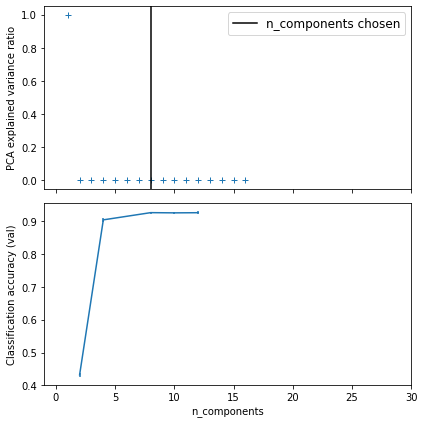

In [ ]:
#This section is about using PCA to find the optimal combinations of features

#TRAIN PCA MODEL
pca.fit(x_train)

#plot PCA components with accuracies and values
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

#creates solid black line on subplot
ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle='solid', label='n_components chosen', color= 'black')
ax0.legend(prop=dict(size=12))

results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 30)
plt.tight_layout()

In [ ]:
pca.explained_variance_ratio_

array([9.99974969e-01, 2.39707997e-05, 9.31239367e-07, 1.16984022e-07,
       1.21037846e-08, 1.48533082e-10, 6.57633839e-13, 4.15049070e-13,
       6.17423539e-14, 1.29526085e-14, 3.05524452e-15, 6.75946127e-16,
       1.22961114e-16, 2.60854809e-18, 2.10125597e-18, 8.14296708e-20])

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=0)

#number of components reccomended by pipeline
pca = PCA(n_components=8)
stdscl = StandardScaler()
logistic = LogisticRegression(C = 0.15848931924611143, max_iter=100000, tol=0.1)

pipe = Pipeline(steps=[('standardscalar', stdscl),('pca', pca),('logistic', logistic)])

In [ ]:
bean_mdl = pipe.fit(x_train, y_train)

In [ ]:
bean_mdl.score(x_test, y_test)

0.9390378259272861

In [ ]:
from joblib import dump, load
dump(bean_mdl, 'bean_mdl.pkl')

['bean_mdl.pkl']

In [ ]:
!ls

 bean_mdl.pkl				      kaggle.json
 Dry_Bean_Dataset_.csv			      my_over_mdl.pkl
 heart_failure_clinical_records_dataset.csv   my_save_mdl.pkl
'kaggle (1).json'			      my_under_mdl.pkl
'kaggle (2).json'


In [ ]:
prediction = bean_mdl.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction, target_names=['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']))

              precision    recall  f1-score   support

    DERMASON       0.94      0.94      0.94       364
        SIRA       1.00      1.00      1.00       361
       SEKER       0.94      0.95      0.94       388
       HOROZ       0.92      0.90      0.91       411
        CALI       0.96      0.95      0.95       413
    BARBUNYA       0.96      0.96      0.96       399
      BOMBAY       0.86      0.89      0.87       387

    accuracy                           0.94      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.94      0.94      0.94      2723



In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, prediction)
conf

array([[341,   0,  17,   0,   0,   2,   4],
       [  0, 361,   0,   0,   0,   0,   0],
       [ 10,   0, 367,   0,   7,   0,   4],
       [  0,   0,   0, 369,   0,   8,  34],
       [  2,   0,   6,   6, 392,   0,   7],
       [  6,   0,   0,   3,   0, 383,   7],
       [  3,   0,   1,  21,  10,   8, 344]])

In [ ]:
test_load_model = load("bean_mdl.pkl")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction, target_names=['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY']))

              precision    recall  f1-score   support

    DERMASON       0.94      0.94      0.94       364
        SIRA       1.00      1.00      1.00       361
       SEKER       0.94      0.95      0.94       388
       HOROZ       0.92      0.90      0.91       411
        CALI       0.96      0.95      0.95       413
    BARBUNYA       0.96      0.96      0.96       399
      BOMBAY       0.86      0.89      0.87       387

    accuracy                           0.94      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.94      0.94      0.94      2723

